# Sesi 15 - Model Deployment

Nama : Ni Made Kirei Kharisma Handayani

Kode Peserta : PYTN-KS08-002

### Importing Libraries

In [66]:
#pip install pandas_profiling

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

In [68]:
data = pd.read_csv('Placement_data_full_class.csv')

# Remove serial number
data.drop("sl_no", axis=1, inplace=True)

### Examining Dataset

In [69]:
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [70]:
print("The shape of the data is (row, column) : " + str(data.shape))
print(data.info())

The shape of the data is (row, column) : (215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [71]:
report = data.profile_report(title='Campus Placement Data - Report',
                            progress_bar=False)

report

### Data cleaning

In [72]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null values : ',
    data['salary'].isnull().sum(), sep='\n')

Salary column with null values : 
0


### Exploring Data

In [73]:
data.gender.value_counts()

M    139
F     76
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

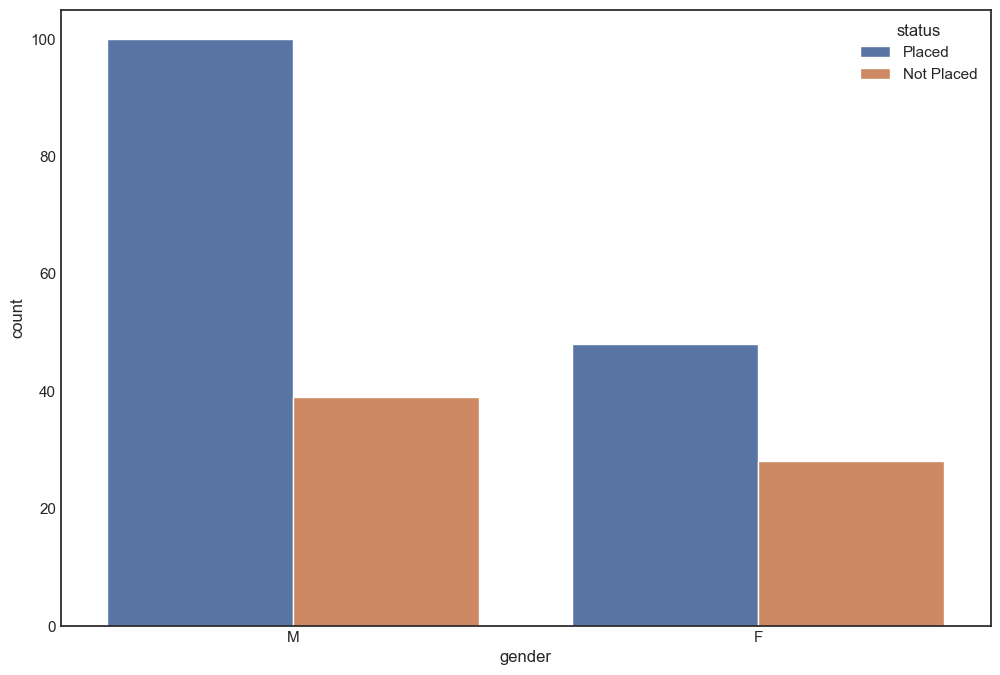

In [74]:
sns.countplot(x="gender", hue="status", data=data)
#plt.show()

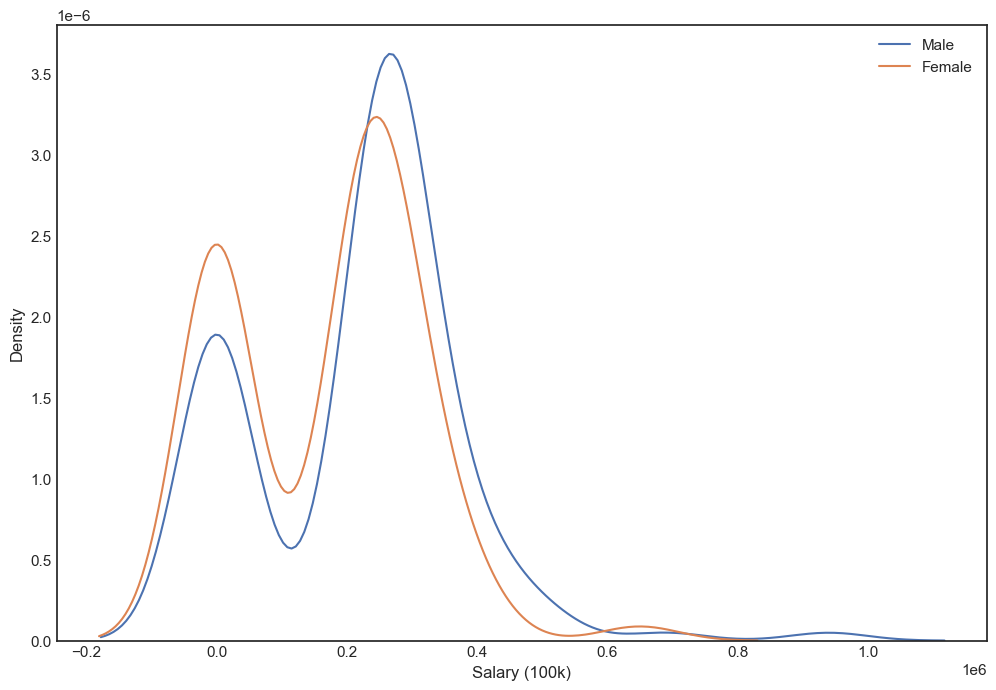

In [75]:
sns.kdeplot(data.salary[data.gender=="M"])
sns.kdeplot(data.salary[data.gender=="F"])
plt.legend(["Male", "Female"])
plt.xlabel("Salary (100k)")
plt.show()

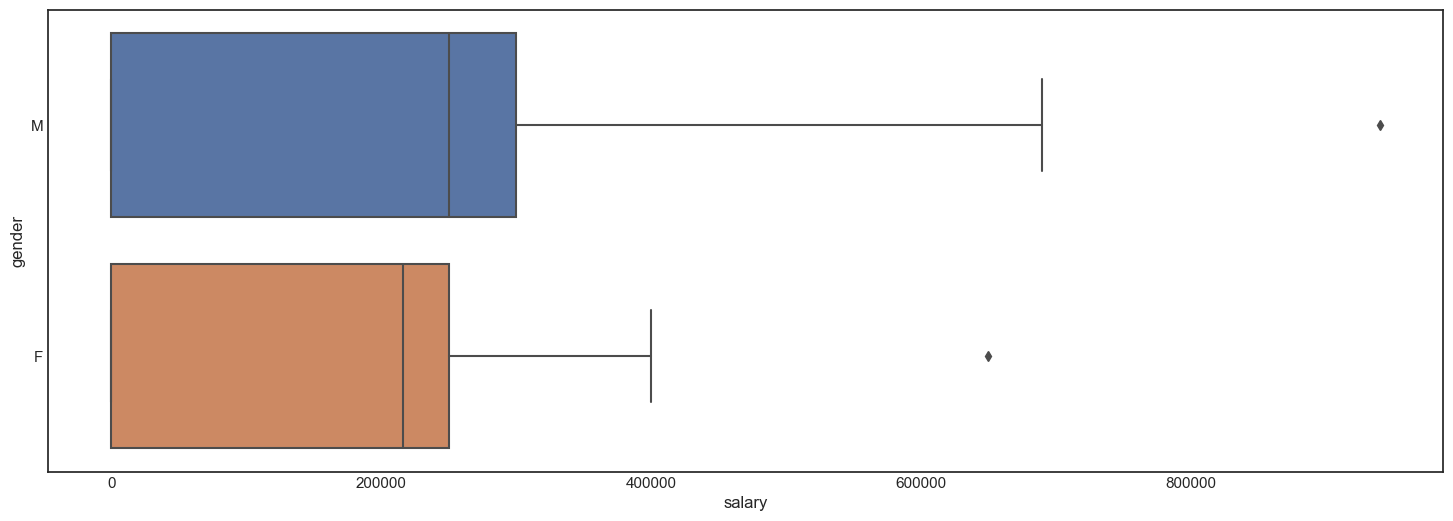

In [76]:
plt.figure(figsize=(18,6))
sns.boxplot(x="salary", y="gender", data=data)
plt.show()

C:\Users\Kirei\AppData\Local\Temp\ipykernel_2364\213037646.py:3: UserWarning: Legend does not support 'P' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Placed", "Not Placed")
C:\Users\Kirei\AppData\Local\Temp\ipykernel_2364\213037646.py:3: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Placed", "Not Placed")
C:\Users\Kirei\AppData\Local\Temp\ipykernel_2364\213037646.py:3: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend("Placed", "Not Placed")
C:\Users\Kirei\AppData\Local\Temp\ipykernel_2364\213037

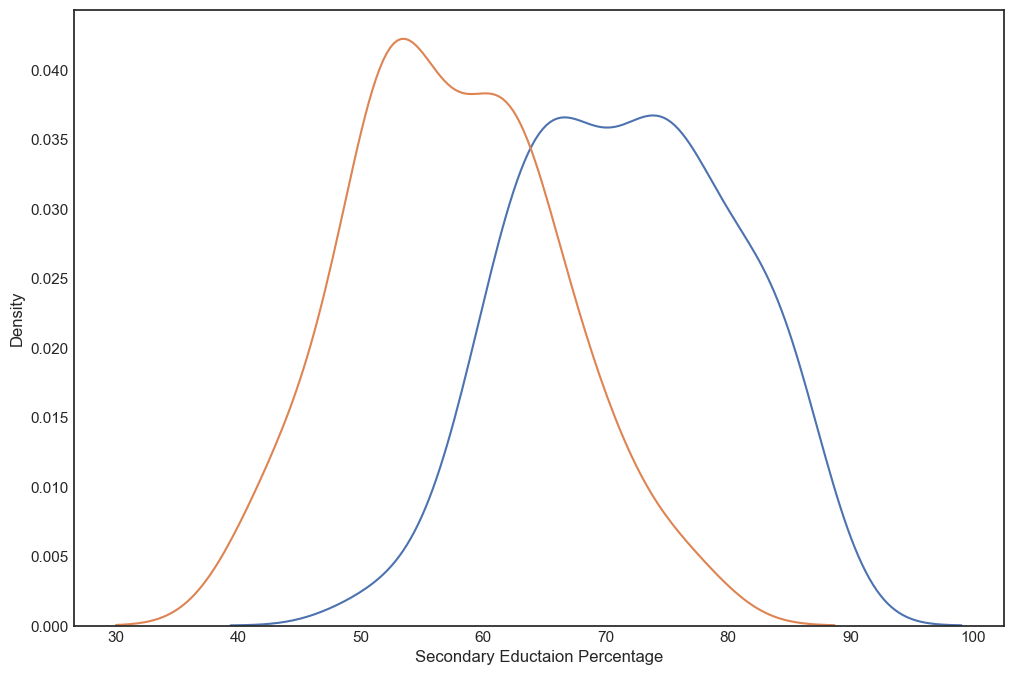

In [77]:
sns.kdeplot(data.ssc_p[data.status=="Placed"])
sns.kdeplot(data.ssc_p[data.status=="Not Placed"])
plt.legend("Placed", "Not Placed")
plt.xlabel("Secondary Eductaion Percentage")
plt.show()

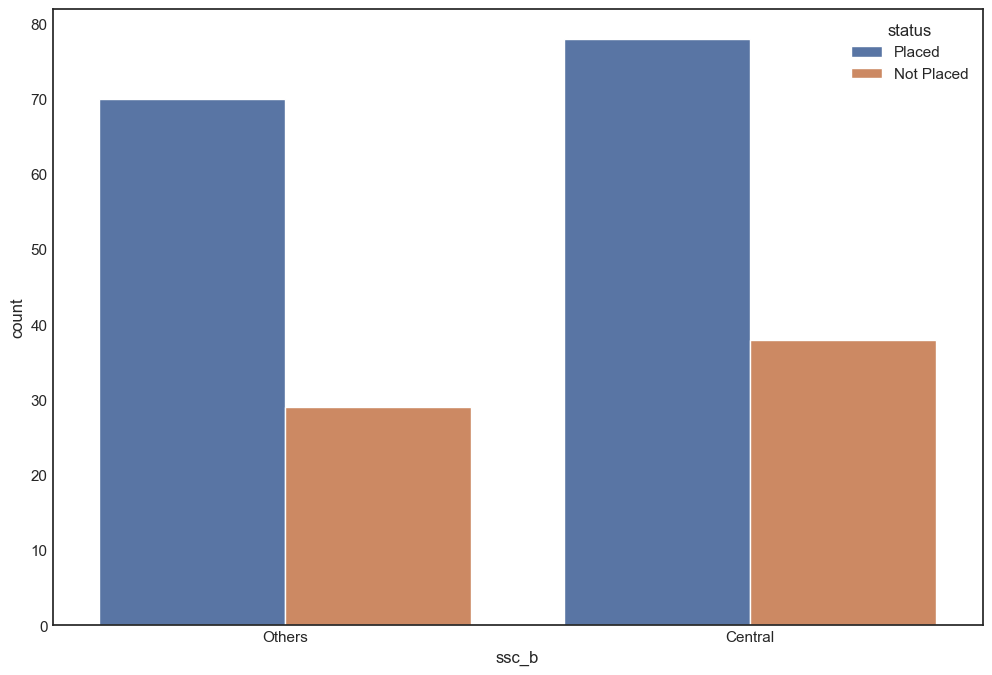

In [78]:
sns.countplot(x="ssc_b", hue="status", data=data)
plt.show()

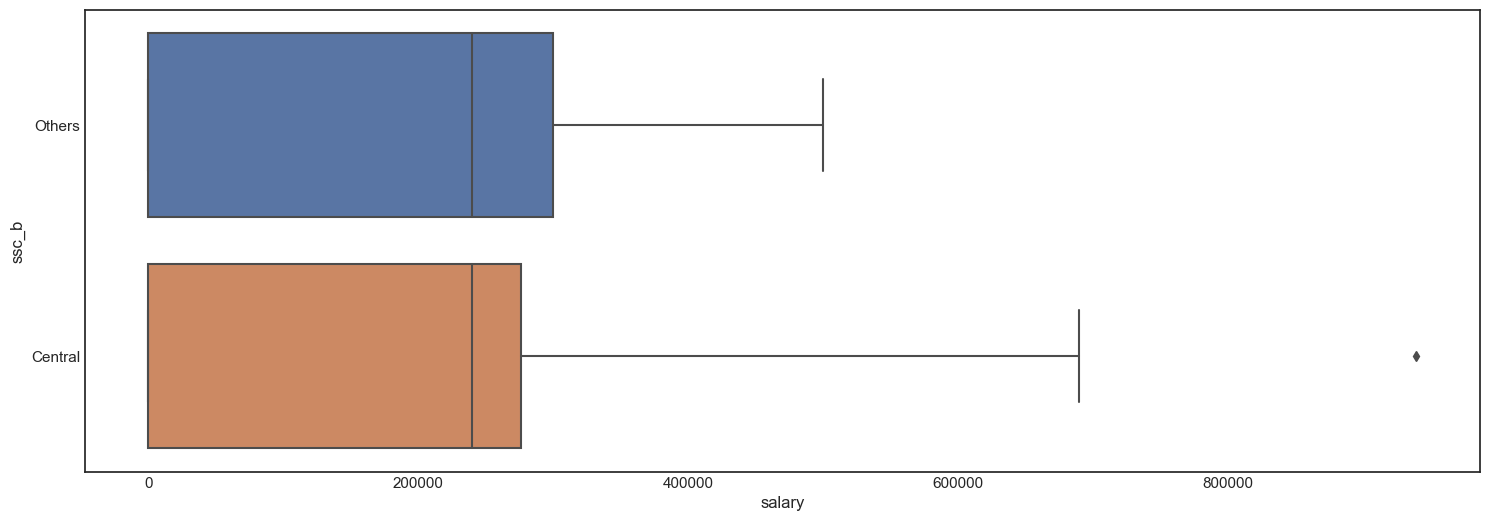

In [79]:
plt.figure(figsize=(18, 6))
sns.boxplot(x="salary", y="ssc_b", data=data)
plt.show()

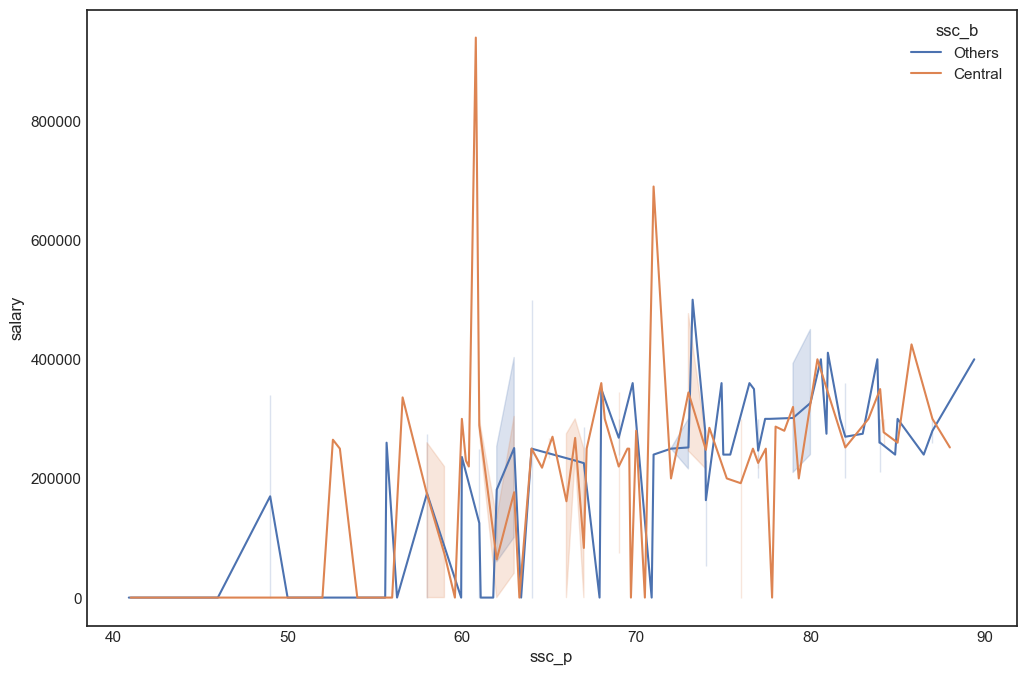

In [80]:
sns.lineplot(x="ssc_p", y="salary", hue="ssc_b", data=data)
plt.show()

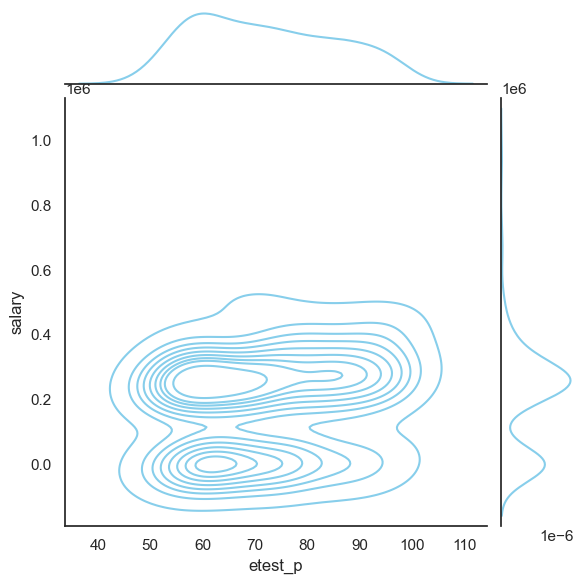

In [81]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=data["etest_p"], y=data["salary"], kind='kde', color="skyblue")

plt.show()

C:\Users\Kirei\AppData\Local\Temp\ipykernel_2364\2517744337.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ssc_p'])
C:\Users\Kirei\AppData\Local\Temp\ipykernel_2364\2517744337.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['hsc_p'])
C:\Users\Kirei\AppData\Local\Temp\ipykerne

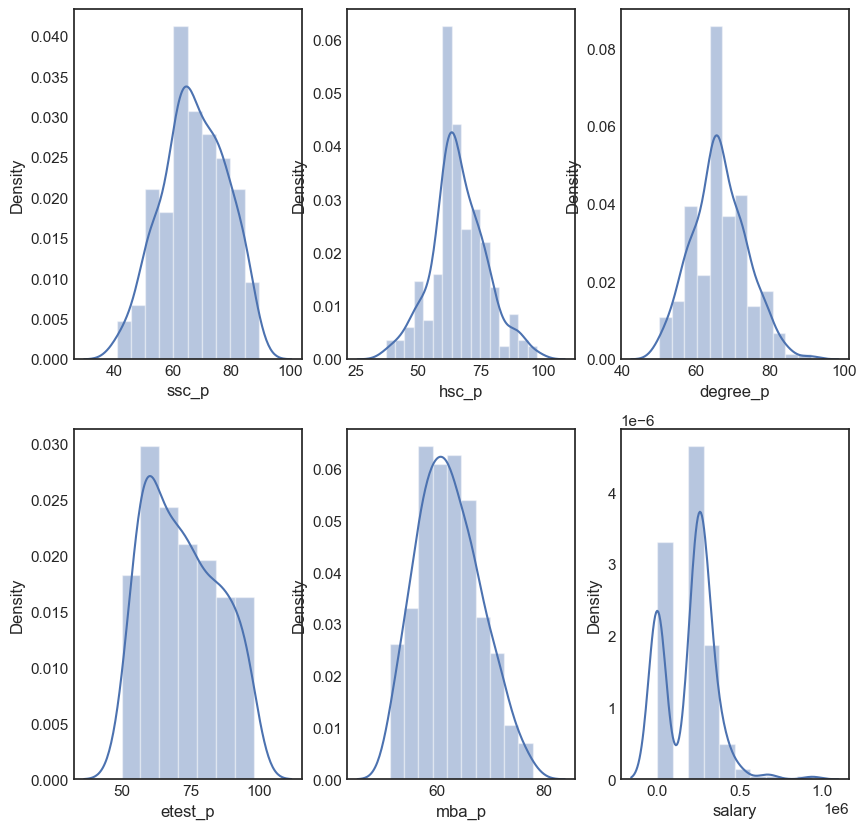

In [82]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig = plt.gcf()
fig.set_size_inches(10,10)

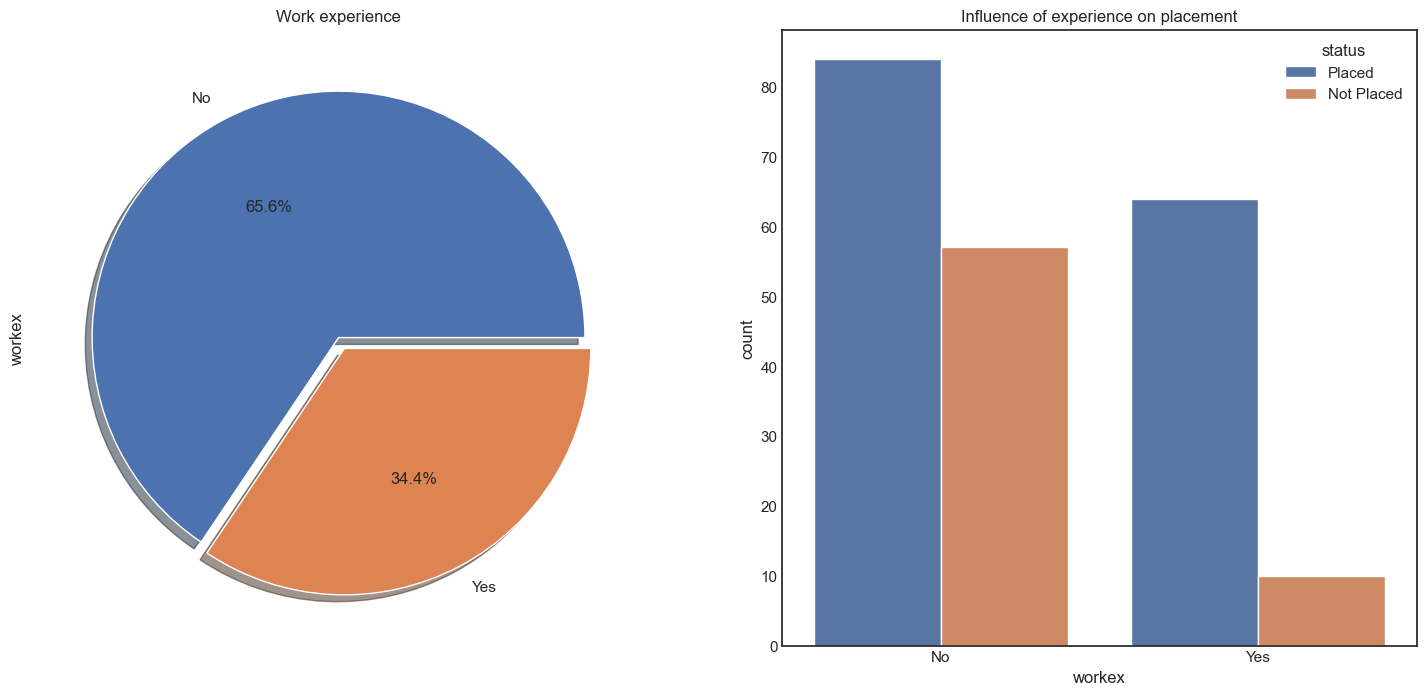

In [83]:
plt.style.use('seaborn-white')
f, ax = plt.subplots(1,2,figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05], autopct='%1.1f%%',
                                                ax = ax[0], shadow=True)

ax[0].set_title('Work experience')
sns.countplot(x='workex', hue='status', data=data)
ax[1].set_title('Influence of experience on placement')

plt.show()

### Preprocessing data

In [84]:
from sklearn.preprocessing import LabelEncoder

object_cols = ['gender', 'workex', 'specialisation', 'status']

label_encoder = LabelEncoder()
for col in object_cols :
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [85]:
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [86]:
# Seperating Features and Target
X = data[['ssc_p', 'hsc_p', 'degree_p', 'etest_p']]
y = data['status']

In [87]:
# Train t\Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [88]:
# Decision Tree
dtree = DecisionTreeClassifier(criterion='entropy')
dtree.fit(X_train, y_train)

y_pred = dtree.predict(X_test)

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score : 0.8
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65



In [89]:
# Using Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy Score : 0.8307692307692308
              precision    recall  f1-score   support

           0       0.76      0.65      0.70        20
           1       0.85      0.91      0.88        45

    accuracy                           0.83        65
   macro avg       0.81      0.78      0.79        65
weighted avg       0.83      0.83      0.83        65



Berdasarkan classification report dapat dilihat bahwa score akurasi model Random Forest lebih baik dari model Decision Tree

In [90]:
# Using Logistic Regression
LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score : 0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



### Getting ready for deployment

#### Pickle

In [91]:
pickle.dump(random_forest, open('model_classifier.pkl', 'wb'))